<a href="https://colab.research.google.com/github/AthiraBinod-19/Business-Analytics/blob/main/Objective1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("surajjha101/bigbasket-entire-product-list-28k-datapoints")

print("Path to dataset files:", path)

100%|██████████| 6.04M/6.04M [00:00<00:00, 130MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/surajjha101/bigbasket-entire-product-list-28k-datapoints/versions/1


In [2]:
import os

# Show all files downloaded in that directory
os.listdir(path)



['BigBasket Products.csv']

In [3]:
import pandas as pd

# Replace filename if it's different
file_path = os.path.join(path, "BigBasket Products.csv")

df = pd.read_csv(file_path)
df.head()


,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [4]:
df.info()
df.isnull().sum()

# Drop rows with missing price values
df = df.dropna(subset=['market_price', 'sale_price'])

# Fill brand/category missing values
df['brand'].fillna('Unknown', inplace=True)
df['category'].fillna('Unknown', inplace=True)
df['sub_category'].fillna('Unknown', inplace=True)

# Ensure numeric columns are correct
df['market_price'] = df['market_price'].astype(float)
df['sale_price'] = df['sale_price'].astype(float)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


/tmp/ipython-input-4-751420855.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['brand'].fillna('Unknown', inplace=True)
/tmp/ipython-input-4-751420855.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [5]:
df['discount_percent'] = ((df['market_price'] - df['sale_price']) / df['market_price']) * 100
df['margin'] = df['market_price'] - df['sale_price']


In [6]:
df.columns


Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description', 'discount_percent',
       'margin'],
      dtype='object')

In [7]:
df[['product', 'market_price', 'sale_price', 'discount_percent']].head()


,product,market_price,sale_price,discount_percent
0,Garlic Oil - Vegetarian Capsule 500 mg,220.0,220.0,0.000000
1,Water Bottle - Orange,180.0,180.0,0.000000
2,"Brass Angle Deep - Plain, No.2",250.0,119.0,52.400000
3,Cereal Flip Lid Container/Storage Jar - Assort...,176.0,149.0,15.340909
4,Creme Soft Soap - For Hands & Body,162.0,162.0,0.000000


In [8]:
df.dtypes


,0
index,int64
product,object
category,object
sub_category,object
brand,object
sale_price,float64
market_price,float64
type,object
rating,float64
description,object


Data Analysis - objective 1

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# For cleaner plots
sns.set(style="whitegrid")



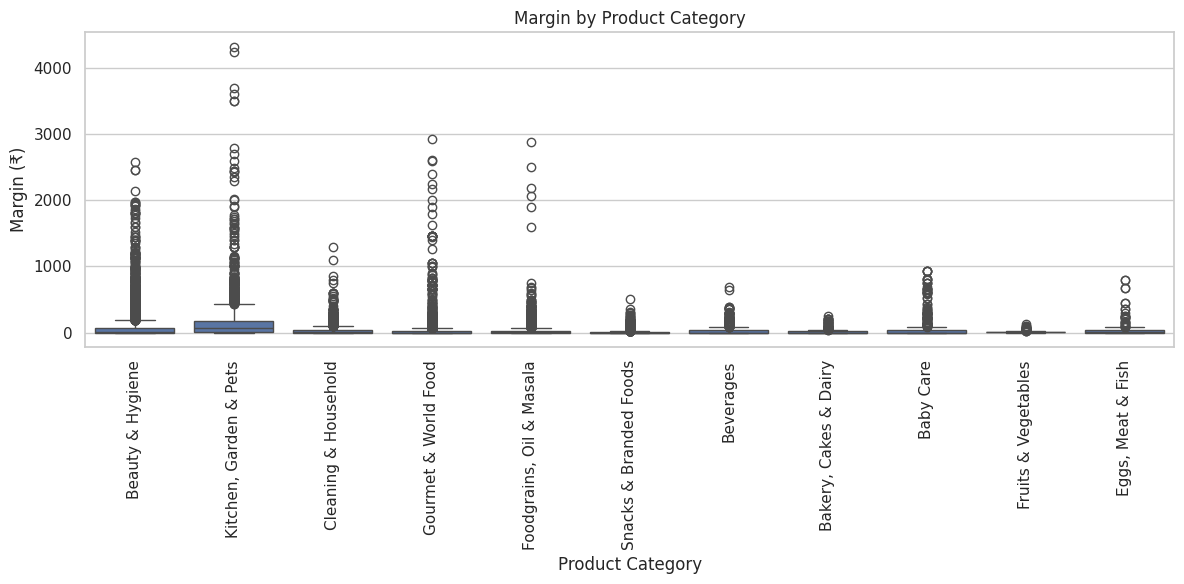

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='category', y='margin')
plt.xticks(rotation=90)
plt.title('Margin by Product Category')
plt.ylabel('Margin (₹)')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()



Top 10 items with high margin is as follows:


In [11]:
df_high_margin = df.sort_values(by='margin', ascending=False)
df_high_margin[['product', 'brand', 'category', 'sale_price', 'market_price', 'margin']].head(10)


,product,brand,category,sale_price,market_price,margin
21930,"Premium Cloth Dryer/Drying Stand - Foldable, S...",DP,"Kitchen, Garden & Pets",4649.0,8969.0,4320.0
23082,"Gas Stove-4 Burner Royale Plus Schott Glass, B...",Prestige,"Kitchen, Garden & Pets",7999.0,12245.0,4246.0
1056,"Gas Stove-3 Burner Royale Plus Schott Glass, B...",Prestige,"Kitchen, Garden & Pets",6999.0,10695.0,3696.0
2343,Induction Base Non Stick Cookware Set With Gla...,Nirlon,"Kitchen, Garden & Pets",1399.0,4999.0,3600.0
8759,"Dinner Set - Laser Etched, Premium Stainless S...",Classic Essentials,"Kitchen, Garden & Pets",2499.0,5999.0,3500.0
1789,Induction Base Non Stick Cookware Set With Gla...,Nirlon,"Kitchen, Garden & Pets",1499.0,4999.0,3500.0
2369,Olive Oil - Extra Light,BORGES,Gourmet & World Food,2280.0,5200.0,2920.0
12430,Olive Oil - Extra Light,BORGES,"Foodgrains, Oil & Masala",2625.0,5500.0,2875.0
13406,3 Burner Gas Stove - Glass Top Manual Ignition...,Pigeon,"Kitchen, Garden & Pets",2799.0,5595.0,2796.0
26933,Starter Dry Dog Food - Ultra Premium,Canine Creek,"Kitchen, Garden & Pets",4050.0,6750.0,2700.0


top 10 items with low margin is as follows:


In [13]:
df_low_margin = df.sort_values(by='margin', ascending=True)
df_low_margin[['product', 'brand', 'category', 'sale_price', 'market_price', 'margin']].head(10)


,product,brand,category,sale_price,market_price,margin
18541,"Instant Tea Premix - Masala, Regular Sugar",Chaayos,Gourmet & World Food,375.0,375.0,0.0
18548,Dove Designer 2 In One Soap Case - Assorted Co...,Nakoda,Cleaning & Household,88.0,88.0,0.0
18518,V2 Scale Out - Washing Machine Descaler,V2,Cleaning & Household,180.0,180.0,0.0
18517,Hand Wash Refill - Original,Dettol,Beauty & Hygiene,218.0,218.0,0.0
18515,Shampoo - Green Apple,Richfeel,Beauty & Hygiene,515.0,515.0,0.0
8913,Sauce - Hot Peri Peri,Nando's,Gourmet & World Food,250.0,250.0,0.0
8904,Chip N Dip - Jalapeno Pita Chips With Sweet Ch...,Wingreens Farms,Gourmet & World Food,120.0,120.0,0.0
8900,"Bathing Soap - Almond & Honey (Softens, Smooth...",Sri Sri Tattva,Beauty & Hygiene,33.0,33.0,0.0
8898,"Amla Candy - Delicious, Healthy and Digestive",Sri Sri Tattva,Gourmet & World Food,170.0,170.0,0.0
18545,Super Shine Soft Bristle Toothbrush,Colgate,Beauty & Hygiene,20.0,20.0,0.0


Categorize products by margin levels:

In [14]:
def categorize_margin(margin):
    if margin <= 100:
        return 'Low Margin'
    elif margin <= 1000:
        return 'Medium Margin'
    else:
        return 'High Margin'


In [15]:
df['margin_category'] = df['margin'].apply(categorize_margin)


In [16]:
df[['product', 'category', 'sale_price', 'market_price', 'margin', 'margin_category']].head()


,product,category,sale_price,market_price,margin,margin_category
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,220.0,220.0,0.0,Low Margin
1,Water Bottle - Orange,"Kitchen, Garden & Pets",180.0,180.0,0.0,Low Margin
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,119.0,250.0,131.0,Medium Margin
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,149.0,176.0,27.0,Low Margin
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,162.0,162.0,0.0,Low Margin


In [17]:
df['margin_category'].value_counts()


,count
margin_category,
Low Margin,23392
Medium Margin,3999
High Margin,164


/tmp/ipython-input-18-2001837826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='margin_category', palette='Set2')


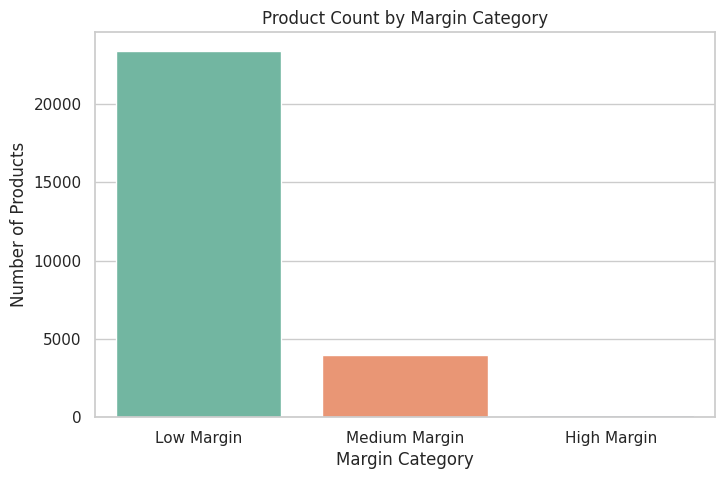

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='margin_category', palette='Set2')
plt.title('Product Count by Margin Category')
plt.xlabel('Margin Category')
plt.ylabel('Number of Products')
plt.show()


Calculating average margin per product category:
Reveals which categories are most and least profitable

Supports decisions on which categories to:

*Promote

*Bundle

*Reprice

In [19]:
avg_margin_by_category = df.groupby('category')['margin'].mean().sort_values(ascending=False)
print(avg_margin_by_category)


category
Kitchen, Garden & Pets      152.133039
Beauty & Hygiene             74.856105
Baby Care                    61.807918
Gourmet & World Food         38.566874
Foodgrains, Oil & Masala     36.964413
Eggs, Meat & Fish            36.938000
Cleaning & Household         35.939163
Beverages                    32.474949
Bakery, Cakes & Dairy        15.078566
Fruits & Vegetables          13.544327
Snacks & Branded Foods       11.182097
Name: margin, dtype: float64


/tmp/ipython-input-20-2822487502.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_margin_by_category.values, y=avg_margin_by_category.index, palette='viridis')


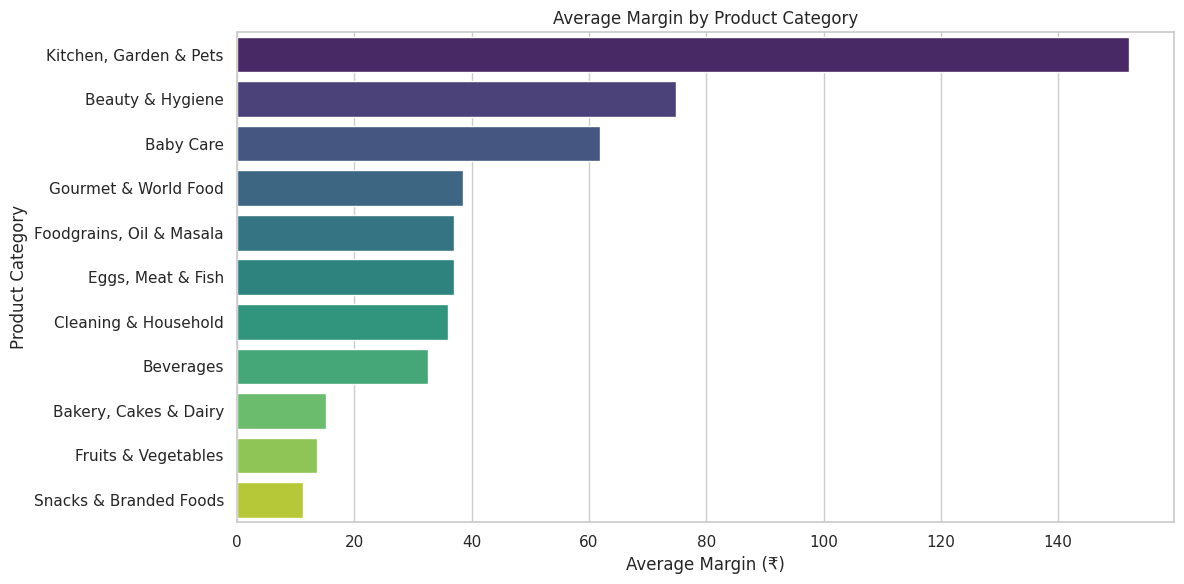

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_margin_by_category.values, y=avg_margin_by_category.index, palette='viridis')
plt.title('Average Margin by Product Category')
plt.xlabel('Average Margin (₹)')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


In [21]:
print(avg_margin_by_category)


category
Kitchen, Garden & Pets      152.133039
Beauty & Hygiene             74.856105
Baby Care                    61.807918
Gourmet & World Food         38.566874
Foodgrains, Oil & Masala     36.964413
Eggs, Meat & Fish            36.938000
Cleaning & Household         35.939163
Beverages                    32.474949
Bakery, Cakes & Dairy        15.078566
Fruits & Vegetables          13.544327
Snacks & Branded Foods       11.182097
Name: margin, dtype: float64


INSIGHTS #1:


High-Margin Categories (₹60 and above)
Kitchen, Garden & Pets, Beauty & Hygiene, and Baby Care

Insights:

These are your most profitable categories.

Likely to include non-perishables and high-MRP specialty items.

Recommendations:

Prioritize these for premium bundling, cross-selling, and targeted promotions.

Consider highlighting them on the website/app for visibility.

Don’t over-discount — you may hurt high profit potential.

💡 Medium-Margin Categories (₹30–₹60)
Gourmet & World Food, Foodgrains, Oil & Masala, Eggs, Meat & Fish, Cleaning & Household, Beverages

Insights:

These categories are decent earners and likely staples or essentials.

Some have high purchase frequency (e.g., Cleaning, Foodgrains).

Recommendations:

Bundle with high-margin items to lift basket value.

Test personalized discounts based on prior purchases.

Optimize pricing — small margin improvements here could have a big impact on overall profit.

⚠️ Low-Margin Categories (Below ₹20)
Bakery, Cakes & Dairy, Fruits & Vegetables, Snacks & Branded Foods

Insights:

These are low-profit categories, possibly due to perishability or price sensitivity.

Likely high volume, so they're still strategically important.

Recommendations:

Use these as loss leaders to attract users, but avoid deep discounting.

Cross-sell with medium/high-margin categories (e.g., dairy + cleaning).

Consider re-negotiating supplier terms or revisiting MRP/Selling Price balance.



Get counts of products by category and margin category:

In [22]:
category_margin_counts = df.groupby(['category', 'margin_category']).size().unstack(fill_value=0)
print(category_margin_counts)


margin_category           High Margin  Low Margin  Medium Margin
category                                                        
Baby Care                           0         512             98
Bakery, Cakes & Dairy               0         831             20
Beauty & Hygiene                   67        6409           1391
Beverages                           0         793             92
Cleaning & Household                2        2400            273
Eggs, Meat & Fish                   0         327             23
Foodgrains, Oil & Masala            6        2433            237
Fruits & Vegetables                 0         556              1
Gourmet & World Food               27        4331            332
Kitchen, Garden & Pets             62        2035           1483
Snacks & Branded Foods              0        2765             49


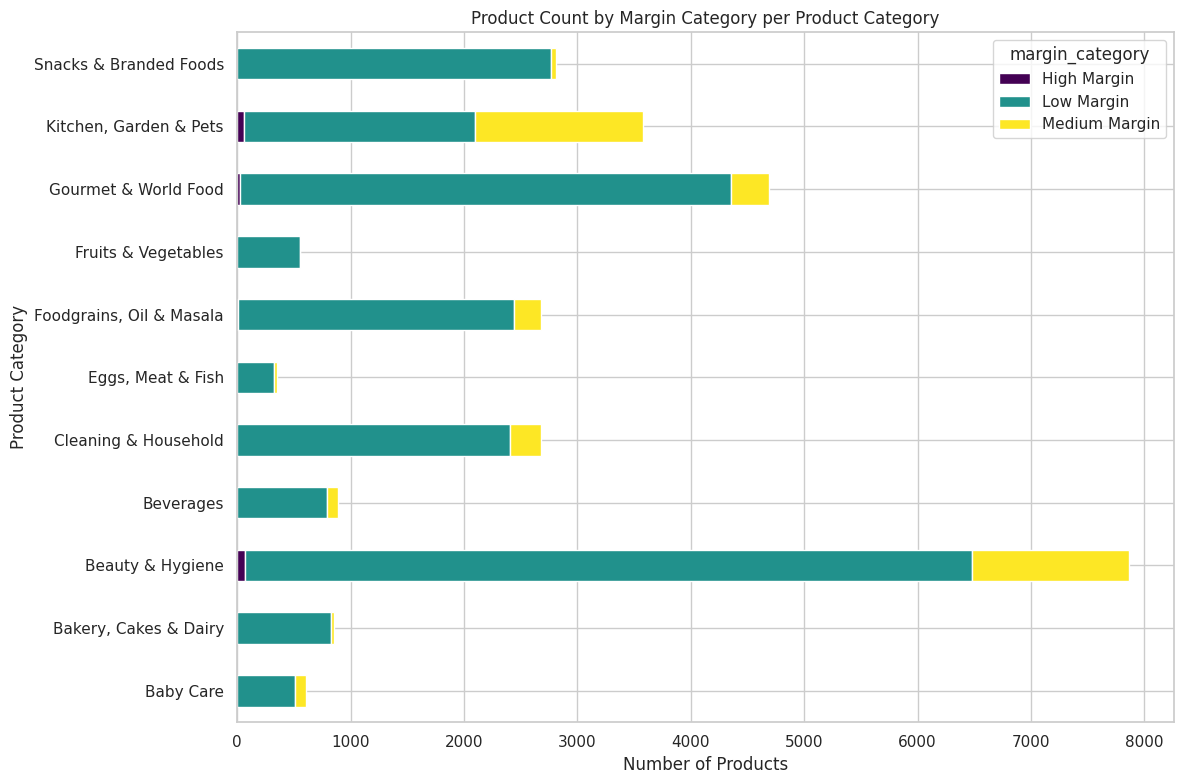

In [23]:
import matplotlib.pyplot as plt

category_margin_counts.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Product Count by Margin Category per Product Category')
plt.xlabel('Number of Products')
plt.ylabel('Product Category')
plt.tight_layout()
plt.show()


Insights from Margin Category Distribution by Product Category
Dominance of Low Margin Products in Most Categories
Across the majority of product categories, low margin products dominate. For example, Beauty & Hygiene has 6,409 low margin items compared to 1,391 medium and only 67 high margin products. Similarly, Bakery, Cakes & Dairy, Baby Care, Beverages, and Snacks & Branded Foods also predominantly consist of low margin products.
Implication: These categories are likely price sensitive, and promotional strategies here should carefully balance discounts to avoid eroding already thin margins.

Categories with Significant Medium Margin Product Presence
Categories such as Kitchen, Garden & Pets (1,483 medium margin products) and Gourmet & World Food (332 medium margin products) have a noticeable presence of medium margin items alongside low margin ones. This mix provides some flexibility for targeted promotions or bundling strategies to boost overall profitability.

Limited High Margin Product Concentration
Most categories have very few high margin products. Exceptions are Beauty & Hygiene (67 products), Kitchen, Garden & Pets (62 products), and Gourmet & World Food (27 products). These high margin products could be strategic for driving profitability through premium positioning or exclusive bundles.

Categories with Almost No Medium or High Margin Items
Fruits & Vegetables and Eggs, Meat & Fish almost entirely consist of low margin products. This likely reflects the competitive and perishable nature of these categories, limiting the ability to command higher margins.

Recommendations:
Focus Promotional Efforts on Medium and High Margin Items: Prioritize bundling and promotional targeting on categories where medium and high margin products exist in reasonable numbers, such as Kitchen, Garden & Pets, Beauty & Hygiene, and Gourmet & World Food. This can improve average basket value without drastically cutting margins.

Carefully Manage Discounts in Low Margin Dominated Categories: For categories like Baby Care, Bakery, Cakes & Dairy, and Snacks & Branded Foods, discounting should be strategic to avoid further margin compression.

Explore Opportunities for Upselling High Margin Products: Use recommendations or combo deals to upsell high margin items, especially in categories where they are available, to enhance profitability.



In [26]:
df['discount_percent'] = ((df['market_price'] - df['sale_price']) / df['market_price']) * 100


In [27]:
print(df.columns)

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description', 'discount_percent',
       'margin', 'margin_category'],
      dtype='object')


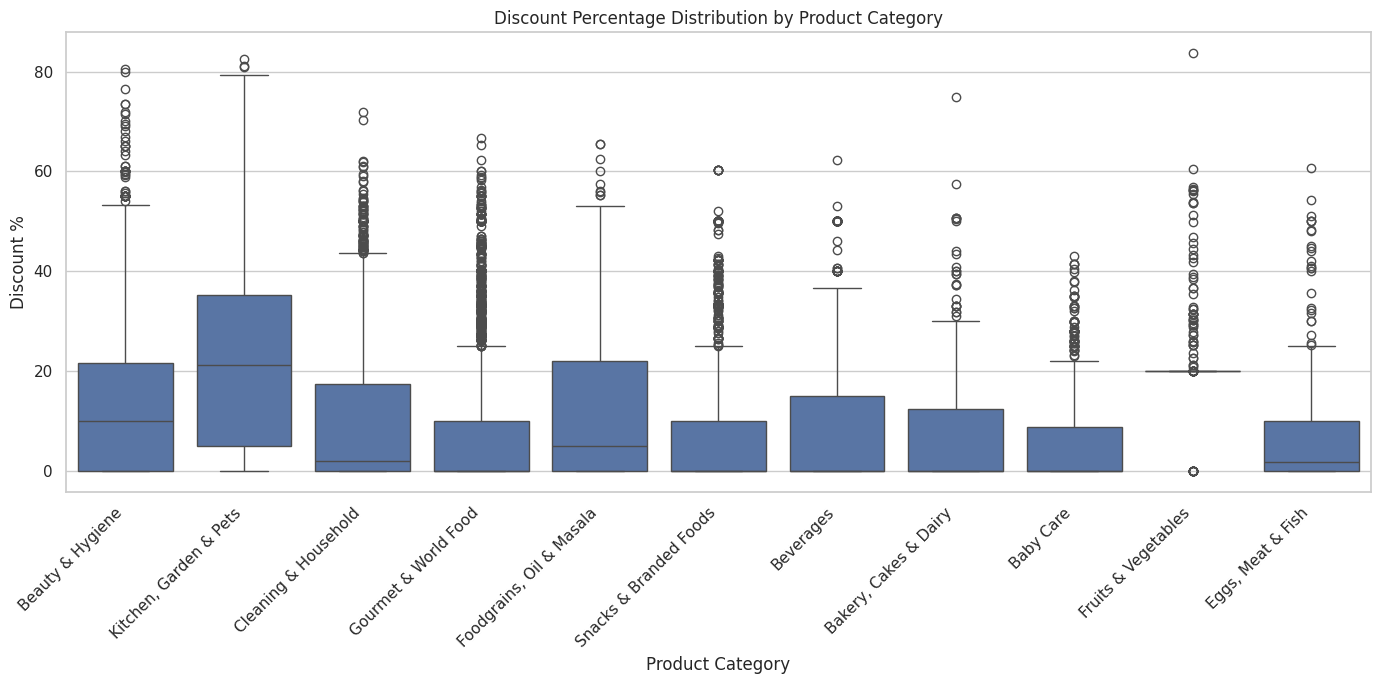

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.boxplot(x='category', y='discount_percent', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Discount Percentage Distribution by Product Category')
plt.ylabel('Discount %')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()


In [29]:
#explore Discount Vs Margin relationship:
correlation = df['discount_percent'].corr(df['margin'])
print(f"Correlation between discount % and margin: {correlation:.3f}")


Correlation between discount % and margin: 0.532


A correlation of 0.532 between discount percentage and margin means there's a moderate positive relationship. This suggests that as the discount percent increases, the margin also tends to increase somewhat — which is a bit counterintuitive because usually, higher discounts reduce margins.

Possible reasons for this positive correlation:
Maybe some products have high base margins, so even with discounts, the margin stays high.

Some categories might apply discounts strategically on high-margin products.

There could be data quirks — check if discount_percent or margin has outliers.



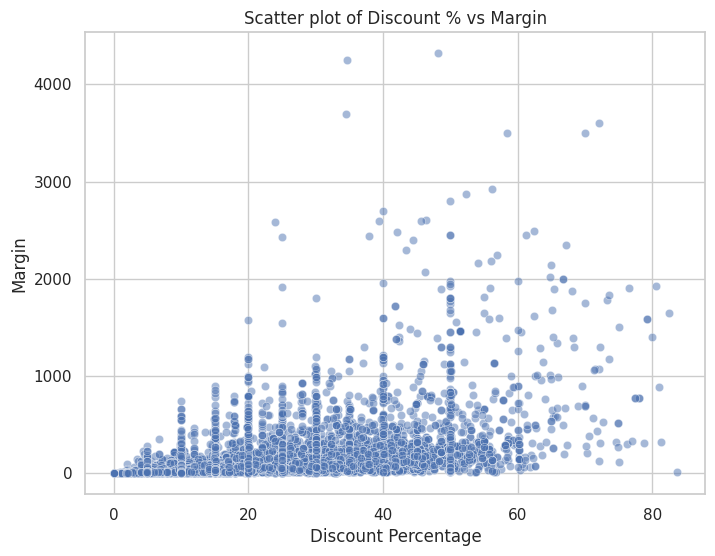

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='discount_percent', y='margin', data=df, alpha=0.5)
plt.title('Scatter plot of Discount % vs Margin')
plt.xlabel('Discount Percentage')
plt.ylabel('Margin')
plt.show()


In [32]:
category_corr = df.groupby('category', group_keys=False).apply(lambda x: x['discount_percent'].corr(x['margin']))
print(category_corr.sort_values())


category
Fruits & Vegetables         0.189753
Foodgrains, Oil & Masala    0.438375
Kitchen, Garden & Pets      0.480866
Gourmet & World Food        0.556758
Beauty & Hygiene            0.572271
Cleaning & Household        0.645177
Snacks & Branded Foods      0.691245
Bakery, Cakes & Dairy       0.693006
Eggs, Meat & Fish           0.693807
Baby Care                   0.757356
Beverages                   0.764893
dtype: float64


/tmp/ipython-input-32-1143429335.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  category_corr = df.groupby('category', group_keys=False).apply(lambda x: x['discount_percent'].corr(x['margin']))


discount_range
0-10%     16390
10-25%     6422
25-50%     4306
50%+        437
Name: count, dtype: int64


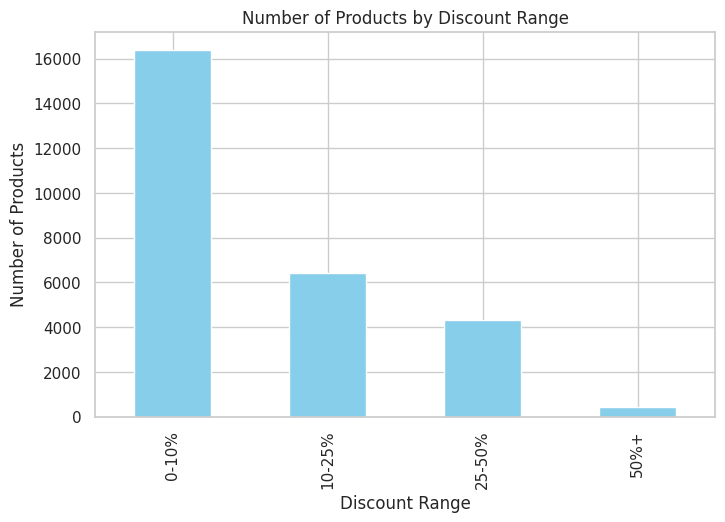

In [33]:
#count of products by discount range
bins = [0, 10, 25, 50, 100]
labels = ['0-10%', '10-25%', '25-50%', '50%+']
df['discount_range'] = pd.cut(df['discount_percent'], bins=bins, labels=labels, include_lowest=True)

discount_counts = df['discount_range'].value_counts().sort_index()
print(discount_counts)

# Plot
discount_counts.plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title('Number of Products by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Number of Products')
plt.show()


/tmp/ipython-input-34-327910747.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_margin_by_discount = df.groupby('discount_range')['margin'].mean()


discount_range
0-10%       6.341917
10-25%     73.710190
25-50%    192.260660
50%+      538.880092
Name: margin, dtype: float64


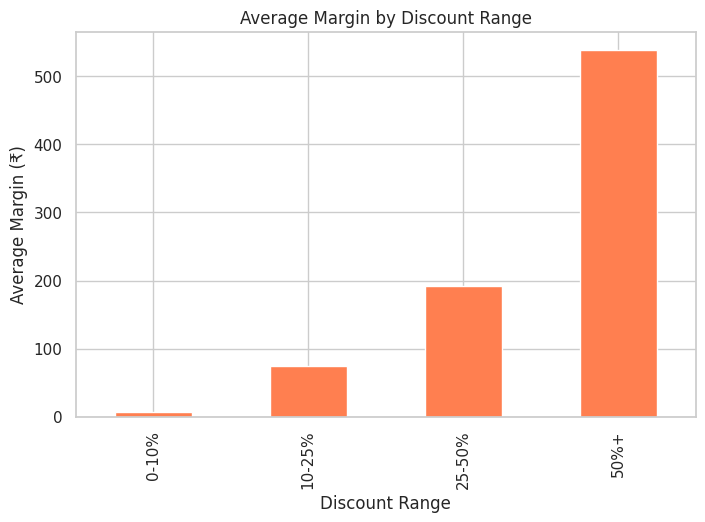

In [34]:
avg_margin_by_discount = df.groupby('discount_range')['margin'].mean()
print(avg_margin_by_discount)

avg_margin_by_discount.plot(kind='bar', figsize=(8,5), color='coral')
plt.title('Average Margin by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Average Margin (₹)')
plt.show()


The bar plot shows how many products fall into each discount range — helping to see where most discounts lie.

The average margin by discount range tells that:

Products with 0-10% discount have an average margin of around ₹6.34 (lowest)

Products with 50%+ discount have an average margin of around ₹538.88 (highest)

*Insights from Top High-Margin Items:

The Kitchen, Garden & Pets category dominates the high-margin segment, featuring premium products like gas stoves, cookware sets, and drying stands with margins often exceeding ₹2,500 per item.

Premium Gourmet & World Food items such as Olive Oil also appear among high-margin products, indicating a good opportunity for focused promotions on gourmet and premium kitchen appliances.

These products have high markups (large gap between market price and sale price), suggesting room for selective discounting or bundling without hurting profitability.

*Insights from Top Low-Margin Items:

Many low-margin products have zero margin, indicating they are sold at or very close to cost price.

These items are mostly fast-moving consumer goods (FMCG) like tea premix, soaps, shampoos, and sauces, which are probably loss-leaders or items aimed at customer retention.

The presence of basic necessities and popular brands with minimal or no margins highlights the need to avoid heavy discounting in this segment, as it could erode profitability further

1. Product Margin Distribution
Products were categorized into Low, Medium, and High Margin based on calculated margin values.

Low Margin: 23,392 products (~82%)

Medium Margin: 3,999 products (~14%)

High Margin: 164 products (<1%)

Most products fall under low-margin, indicating a competitive pricing structure with narrow profit buffers, especially for essential items.

📦 2. Category-wise Margin Insights
Categories with highest average margins:

Kitchen, Garden & Pets (₹152.13)

Beauty & Hygiene (₹74.86)

Baby Care (₹61.80)

Categories with lowest average margins:

Snacks & Branded Foods (₹11.18)

Fruits & Vegetables (₹13.54)

Bakery, Cakes & Dairy (₹15.08)

Implication: Focused promotions and bundling strategies should prioritize high-margin categories, while tighter discount control is needed for low-margin staples.

💸 3. Discount Percent & Margin Correlation
Overall correlation between discount_percent and margin: 0.532 (moderate positive).

Category-level correlation highlights stronger relationships:

Beverages: 0.76

Baby Care: 0.75

Eggs, Meat & Fish: 0.69

Insight: Products with higher margins tend to be discounted more, likely due to greater pricing flexibility. This creates an opportunity for promotional targeting without harming profitability.

📊 4. Margin by Discount Range
Discount Range	Avg. Margin (₹)
0–10%	₹6.34
10–25%	₹73.71
25–50%	₹192.26
50%+	₹538.88

Insight: Deep discounts are generally applied on high-margin items. This supports a premium discounting strategy—only discount where margins allow.

🏷️ 5. Sample Product-Level Findings
High-Margin Products (₹2,700–₹4,300):
Gas stoves, cookware sets (Prestige, Nirlon)

Olive oil (Borges), premium pet food (Canine Creek)

Low/Zero-Margin Products (₹0–₹1):
Everyday FMCGs: soaps, teas, sauces (Dettol, Chaayos, Colgate)

Often priced at MRP or used as loss leaders to drive customer retention

Insight: High-margin items are often durable or premium goods—ideal for targeted promotions or bundling. Low-margin items should be discounted carefully or paired with higher-margin items.

✅ Conclusion
BigBasket’s pricing and discounting strategy reveals a strong potential to:

Promote high-margin categories (kitchenware, personal care, premium food) more aggressively

Use discounts strategically to boost conversion without damaging margins

Protect low-margin essentials with minimal or no discounts, or bundle them with higher-margin products to raise average basket value

This analysis provides a clear foundation for data-driven pricing, promotional targeting, and bundling decisions to improve profitability and customer satisfaction.

